In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
import yaml

In [2]:
with open("../config.yaml", "r") as file:
    config = yaml.safe_load(file)


In [3]:
labels = glob("../label/*.json")
labels.sort()

In [4]:
# Read the json file
with open(labels[-1]) as f:
    data = json.load(f)
    print(f)

<_io.TextIOWrapper name='../label/project-4-at-2024-04-24-08-27-5e672992.json' mode='r' encoding='UTF-8'>


In [5]:
entities = []
relations = []
sent_entities = []
sent_relations = []

for sentence in data:
    t_entities = []
    t_relations = []
    for annotation in sentence["annotations"][0]["result"]:
        if annotation["type"] == "labels":
            entities.append(annotation["value"]["labels"][0])
            t_entities.append(annotation["value"]["labels"][0])
        elif annotation["type"] == "relation":
            relations.append(annotation["labels"])
    sent_entities.append(list(set(t_entities)))
 #   sent_relations.append(list(set(relations)))

In [6]:
sentences = [sentence["data"]["text"] for sentence in data]

check duplicated sentences. True means no duplicates

In [7]:
len(set(sentences)) == len(sentences)

True

In [8]:
relations = [item for items in relations for item in items]
#entities = [item for items in entities for item in items]
sent_entities = [item for items in sent_entities for item in items]

In [9]:
pd.DataFrame(sent_entities).value_counts()

0         
STRAIN        2383
ORGANISM      1105
EFFECT         909
METABOLITE     889
PROTEIN        773
SPECIES        727
COMPOUND       614
ISOLATE        503
PHENOTYPE      411
MEDIUM         358
DISEASE        309
GENE           301
GENUS          178
MORPHOLOGY     170
VIRUS          112
ASSEMBLY         6
Name: count, dtype: int64

In [10]:
ner_df = pd.DataFrame(sent_entities).value_counts().reset_index().rename(columns={0:"ner", "count":"count_per_sentence"})

Text(0.5, 1.0, 'Number of sentences with entity')

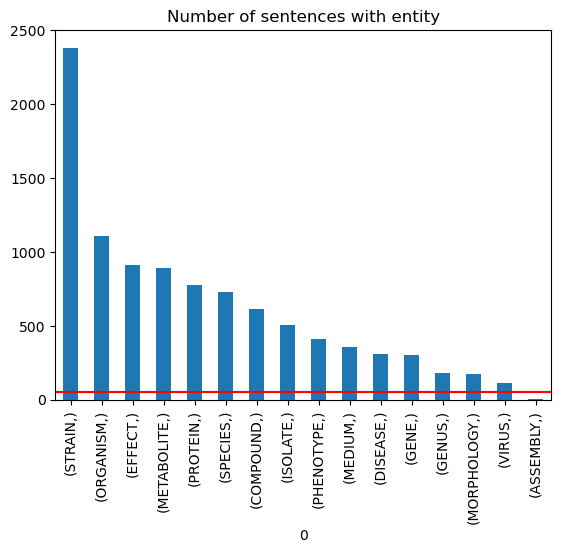

In [11]:
pd.DataFrame(sent_entities).value_counts().plot(kind='bar')
plt.axhline(50, color='red')
plt.title('Number of sentences with entity')

In [12]:
ner_df = ner_df.merge(pd.DataFrame(entities).value_counts().reset_index().rename(columns={0:"ner", "count":"count_per_entity"}))


Text(0.5, 1.0, 'Total number of entities')

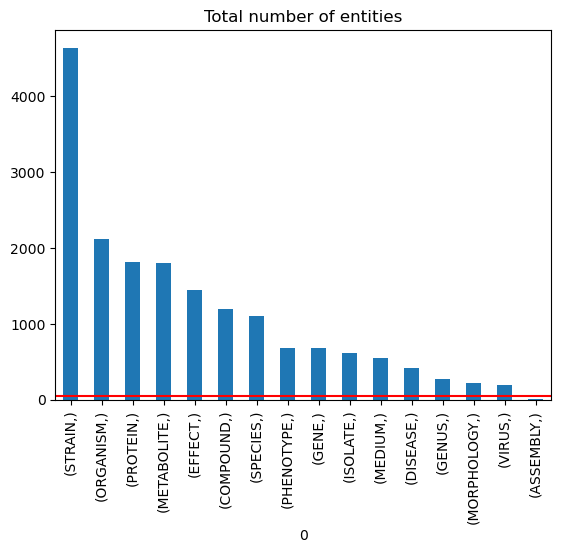

In [13]:
pd.DataFrame(entities).value_counts().plot(kind='bar')
plt.axhline(50, color='red')
plt.title('Total number of entities')

In [14]:
ner_df_m = ner_df.melt("ner", var_name="type", value_name="count")

In [15]:
ner_df_m

,ner,type,count
0,STRAIN,count_per_sentence,2383
1,ORGANISM,count_per_sentence,1105
2,EFFECT,count_per_sentence,909
3,METABOLITE,count_per_sentence,889
4,PROTEIN,count_per_sentence,773
5,SPECIES,count_per_sentence,727
6,COMPOUND,count_per_sentence,614
7,ISOLATE,count_per_sentence,503
8,PHENOTYPE,count_per_sentence,411
9,MEDIUM,count_per_sentence,358


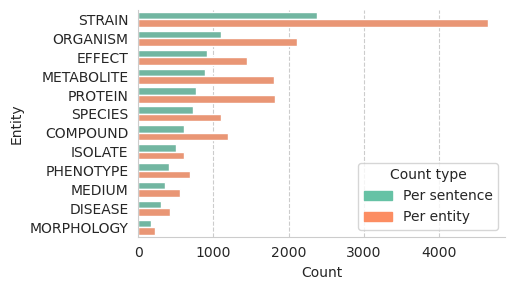

In [16]:
import matplotlib.patches as mpatches

# Define the colors for the legend
colors = ["#66c2a5", "#fc8d62"]

# Create the patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, ["Per sentence", "Per entity"])]

# Set the style to show faint vertical grid lines
sns.set_style("whitegrid", {"axes.grid": True, "grid.linestyle": "--", "grid.alpha": 0.3})

# Plot the graph
sns.catplot(y="ner", x="count", hue="type", kind="bar", data=ner_df_m[ner_df_m["ner"].isin(config["ner_labels"])], palette="Set2", legend=False, height=3, aspect=1.75)
plt.xlabel("Count")
plt.ylabel("Entity")
plt.legend(handles=patches, title="Count type")

plt.savefig("./figures/predictions/labeled_entities_counts.pdf")

### RELS

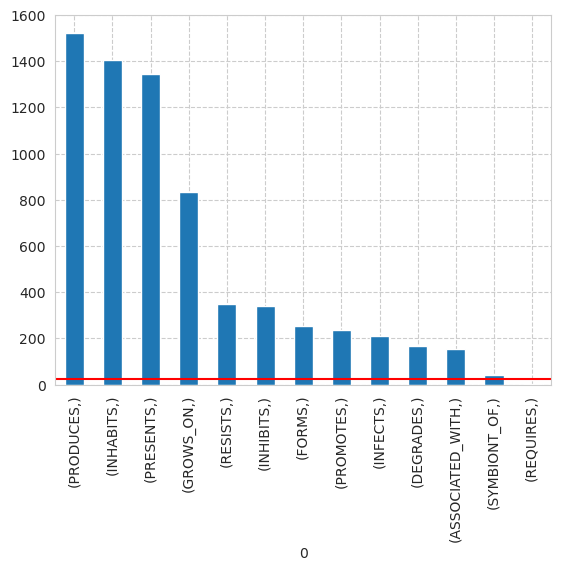

In [17]:
pd.DataFrame(relations).value_counts().plot(kind='bar')
plt.axhline(25, color='red')

In [18]:
sentence_id = []
sentence_text = []
relationships = []
for sentence in data:
    ids = {} # id -> label dictionary
    for annotation in sentence["annotations"][0]["result"]:
        if annotation["type"] == "labels":
            ids[annotation["id"]] = annotation["value"]["labels"]
#            text[annotation["id"]] = annotation["value"]["text"]
        elif annotation["type"] == "relation":
#            print(ids.get(annotation["from_id"]),"->", ids.get(annotation["to_id"]), ":", annotation["labels"])
            s = str(*ids.get(annotation["from_id"]))+"->"+ str(*ids.get(annotation["to_id"]))+ ":"+ str(*annotation["labels"])
            relationships.append(s)
            sentence_text.append(sentence["data"]["text"])
            sentence_id.append(sentence["id"])

In [19]:
df = pd.DataFrame({"sentence_id":sentence_id, "text" : sentence_text,"relationship":relationships})

In [20]:
grouped = df.groupby(["sentence_id", "relationship"]).count().reset_index()
filtered = grouped[grouped["relationship"] == "STRAIN->ISOLATE:INHABITS"]

Make split using `pd.sample`

In [21]:
counts = pd.DataFrame(relationships).value_counts()

In [22]:
df[df["relationship"]=="STRAIN->ORGANISM:INHIBITS"]

,sentence_id,text,relationship
810,7670,A co-culture of the durum wheat plant root-ass...,STRAIN->ORGANISM:INHIBITS
811,7670,A co-culture of the durum wheat plant root-ass...,STRAIN->ORGANISM:INHIBITS
1396,7885,"In our previous study, both OsiSh-2 and its cu...",STRAIN->ORGANISM:INHIBITS
4357,9712,Recent reports indicated that B. velezensis st...,STRAIN->ORGANISM:INHIBITS
4358,9712,Recent reports indicated that B. velezensis st...,STRAIN->ORGANISM:INHIBITS
4361,9712,Recent reports indicated that B. velezensis st...,STRAIN->ORGANISM:INHIBITS
4362,9712,Recent reports indicated that B. velezensis st...,STRAIN->ORGANISM:INHIBITS
4547,9856,"A study by Müller, et al. [123] demonstrated t...",STRAIN->ORGANISM:INHIBITS
4752,9939,"In the present study, 20 different strains wer...",STRAIN->ORGANISM:INHIBITS
4753,9939,"In the present study, 20 different strains wer...",STRAIN->ORGANISM:INHIBITS


In [23]:
cnts = counts.reset_index()

In [24]:
cnts[(cnts[0].str.contains("STRAIN"))&(cnts["count"]>0)].set_index(0)

,count
0,
STRAIN->ISOLATE:INHABITS,891
STRAIN->METABOLITE:PRODUCES,788
STRAIN->MEDIUM:GROWS_ON,754
STRAIN->PHENOTYPE:PRESENTS,711
STRAIN->PROTEIN:PRODUCES,483
STRAIN->ORGANISM:INHABITS,432
STRAIN->EFFECT:PRESENTS,321
STRAIN->COMPOUND:RESISTS,254
STRAIN->MORPHOLOGY:FORMS,230


Text(0, 0.5, '')

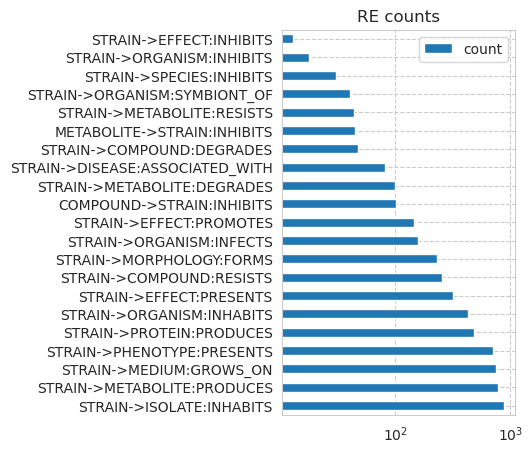

In [25]:
cnts[(cnts[0].str.contains("STRAIN"))&(cnts["count"]>12)].set_index(0).plot(kind='barh',figsize=(3,5),logx=True)
plt.title("RE counts")
plt.ylabel("")

In [26]:
c = cnts.rename(columns={0:"relationship"})

In [27]:
c["re"] = c.relationship.str.split(":",expand=True)[1]
c["ner_re"] = c.relationship.str.split(":",expand=True)[0]

In [28]:
c["non_strain_ner"] = c.relationship.str.split(":", expand=True)[0].str.split("->").apply(lambda x: [elem for elem in x if elem != "STRAIN"])


In [29]:
c["relationship"] = c.relationship.str.replace("->", "-")
c["ner_re"] = c["ner_re"].str.replace("->", "-")

In [30]:
cs = c[c['non_strain_ner'].apply(lambda x: len(x) == 1)]


In [31]:
cs.set_index("re")[["ner_re", "count"]]

,ner_re,count
re,,
INHABITS,STRAIN-ISOLATE,891
PRODUCES,STRAIN-METABOLITE,788
GROWS_ON,STRAIN-MEDIUM,754
PRESENTS,STRAIN-PHENOTYPE,711
PRODUCES,STRAIN-PROTEIN,483
INHABITS,STRAIN-ORGANISM,432
PRESENTS,STRAIN-EFFECT,321
RESISTS,STRAIN-COMPOUND,254
FORMS,STRAIN-MORPHOLOGY,230


In [32]:
cs.set_index("re")[["ner_re", "count"]]

,ner_re,count
re,,
INHABITS,STRAIN-ISOLATE,891
PRODUCES,STRAIN-METABOLITE,788
GROWS_ON,STRAIN-MEDIUM,754
PRESENTS,STRAIN-PHENOTYPE,711
PRODUCES,STRAIN-PROTEIN,483
INHABITS,STRAIN-ORGANISM,432
PRESENTS,STRAIN-EFFECT,321
RESISTS,STRAIN-COMPOUND,254
FORMS,STRAIN-MORPHOLOGY,230


In [33]:
cs['non_strain_ner'] = cs['non_strain_ner'].explode()


/tmp/ipykernel_50874/975501423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['non_strain_ner'] = cs['non_strain_ner'].explode()


In [34]:
cs_filter = cs[(cs["count"]>11)&(cs["non_strain_ner"]!="VIRUS")]

In [35]:
cs_filter

,relationship,count,re,ner_re,non_strain_ner
0,STRAIN-ISOLATE:INHABITS,891,INHABITS,STRAIN-ISOLATE,ISOLATE
1,STRAIN-METABOLITE:PRODUCES,788,PRODUCES,STRAIN-METABOLITE,METABOLITE
2,STRAIN-MEDIUM:GROWS_ON,754,GROWS_ON,STRAIN-MEDIUM,MEDIUM
3,STRAIN-PHENOTYPE:PRESENTS,711,PRESENTS,STRAIN-PHENOTYPE,PHENOTYPE
4,STRAIN-PROTEIN:PRODUCES,483,PRODUCES,STRAIN-PROTEIN,PROTEIN
5,STRAIN-ORGANISM:INHABITS,432,INHABITS,STRAIN-ORGANISM,ORGANISM
6,STRAIN-EFFECT:PRESENTS,321,PRESENTS,STRAIN-EFFECT,EFFECT
7,STRAIN-COMPOUND:RESISTS,254,RESISTS,STRAIN-COMPOUND,COMPOUND
8,STRAIN-MORPHOLOGY:FORMS,230,FORMS,STRAIN-MORPHOLOGY,MORPHOLOGY
9,STRAIN-ORGANISM:INFECTS,159,INFECTS,STRAIN-ORGANISM,ORGANISM


In [36]:
pivot_df = cs_filter.pivot_table(index='re', columns='non_strain_ner', values='count', aggfunc='sum').fillna(0)


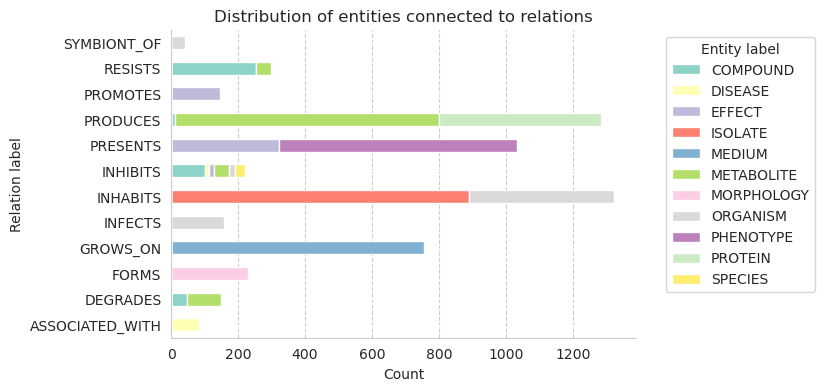

In [37]:
pivot_df.plot(kind='barh', stacked=True, colormap='Set3', figsize=(6, 4))

plt.xlabel('Count')
plt.ylabel('Relation label')
plt.title('Distribution of entities connected to relations')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Entity label")

# Remove horizontal axis lines in the background
plt.grid(axis='y', which='both', color='white')

# Remove the right spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.savefig("./figures/predictions/relationship_distribution.pdf", bbox_inches='tight')